# Matrix decomposition

###### COMP4670/8600 - Statistical Machine Learning - Tutorial

Setting up the environment

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.optimize as opt
import pickle

%matplotlib inline

## Vectors, matrices and operations in Python

The `numpy` library allows us to conveniently represent and work with vectors, matrices and tensors in higher dimensions. It supports many operations in linear algebra and will be used in the assignments this semester.

If you are unfamiliar with `numpy`, we highly recommend you spend sometime familiarising yourself with it, especially by consulting [its documentation](https://numpy.org/doc/stable/reference/index.html). If you are confident with it, you can skip this section.

Vectors and matrices are both represented using an `np.array` object. Typically:

- Vectors are one-dimensional arrays: for example, `x = np.array([1,2,3])`
- Matrices are two-dimensional arrays: for example, `A = np.array([[1,2,3], [4,5,6], [7,8,9]]]`

### Some useful attributes of `np.array`

In [2]:
# First, define an array
X = np.array([[1,  2,  3,  4],
              [5,  6,  7,  8],
              [9, 10, 11, 12]],
             dtype=np.int32)

In [3]:
# shape: this tells you the dimensions of the array
X.shape

(3, 4)

In [4]:
# size: this tells you how many items the array has 
#       in total
X.size

12

In [5]:
# dtype: this tells you what format each element of
#        the array is stored as
X.dtype

dtype('int32')

In [6]:
# T: for 2D matrices, you can easily transpose them
X.T

array([[ 1,  5,  9],
       [ 2,  6, 10],
       [ 3,  7, 11],
       [ 4,  8, 12]], dtype=int32)

### Some useful methods and operations on `np.array`

In [7]:
# First, define some arrays
A = np.array([[1,  2,  3,  4],
              [5,  6,  7,  8],
              [9, 10, 11, 12]],
             dtype=np.int32)

B = np.array([[13,  14,  15,  16],
              [17,  18,  19,  20],
              [21,  22,  23,  24]],
             dtype=np.int32)

x = np.array([4, 3, 2, 1])

y = np.array([9, 8, 7, 6])

In [8]:
# Element-wise operation: add 1 to all elements of an array
A + 1

array([[ 2,  3,  4,  5],
       [ 6,  7,  8,  9],
       [10, 11, 12, 13]], dtype=int32)

In [9]:
# For two arrays of the same shape, you can add/subtract/... them
assert A.shape == B.shape
A / B

array([[0.07692308, 0.14285714, 0.2       , 0.25      ],
       [0.29411765, 0.33333333, 0.36842105, 0.4       ],
       [0.42857143, 0.45454545, 0.47826087, 0.5       ]])

In [10]:
# Dot product between two vectors of the same size
x.dot(y)

80

In [11]:
# Matrix-vector product
assert A.shape[1] == x.shape[0]
A @ x

array([ 20,  60, 100])

In [12]:
# Matrix-matrix product
assert A.shape[1] == B.T.shape[0]
A @ B.T

array([[150, 190, 230],
       [382, 486, 590],
       [614, 782, 950]], dtype=int32)

**Be careful**: When working with `np.array`

- The operator `*` represents the element-wise product, whereas
- The operator `@` represents the matrix product defined in linear algebra.

You should choose the right operator for your purpose!

**Side notes**: 

- The `np.dot` function could also be used for dot products, matrix-vector products and matrix-matrix products. So, `A @ x` is equivalent to `np.dot(A, x)`. In fact, the `@` operator is basiscally the `np.matmul` function.
- You might have seen another (soon-to-be-deprecated) object in `numpy` called `np.matrix`. This is similar to `np.array`, but in this case both the `*` and `@` operators represent the matrix product. Therefore, the safest choice to make when you want to use the matrix product is `@`, regardless of whether you use `np.array` or `np.matrix`.

Now that you are comfortable with `numpy`, let's move on to main dish of the lab.

## Covariance matrix and positive semidefinite matrix

For a dataset $X$ with $N$ examples and $D$ features, we can represent it as a matrix where every column represents a data example.
1. What are the dimensions of this matrix $X$? In `numpy`, what is its shape?
2. The covariance matrix $C$ is the matrix representing the variance and covariance between each pair of features. Write the formula for calculating $C$. What is the size of this matrix?
3. Take a look at the `gen_data` function below. What does it do? Generate a data matrix $X$ using that function. Compute the covariance matrix $C$ and its [eigenvalue decomposition](https://numpy.org/doc/stable/reference/generated/numpy.linalg.eigh.html) using `np.linalg.eigh`.

### <span style="color:blue">Answer</span>

1. The dimensions of the this matrix is $D \times N$. In numpy, X is an ndarray of shape (D, N), where each column of X is an example of D features.

2. The covariance matrix C is given by $$C = \frac{1}{n}XX^T$$
therefore, the shape of C is $D\times D$. This definition only works when $X$ is mean-centered.

In [13]:
def gen_data(n_samples=100, n_feat=5):
    """Generate data from two Gaussians
    n_samples = number of samples from each Gaussian
    n_feat = dimension of the features
    """
    X1 = np.ones((n_feat, n_samples))   + np.random.randn(n_feat, n_samples)
    X2 = - np.ones((n_feat, n_samples)) + np.random.randn(n_feat, n_samples)
    X  = np.hstack([X1, X2])
    return X

In [14]:
# replace this with your solution, add and remove code and markdown cells as appropriate
X = gen_data()
n_feat, n_samples = X.shape
print("X shape:", X.shape)

X shape: (5, 200)


In [15]:
C = np.dot(X, X.T) / n_samples

# print(C)
# calculating eigenvalues of C
lambd, U = np.linalg.eigh(C)

print("The eigenvalues of C are", lambd)

The eigenvalues of C are [0.79523513 1.04707576 1.15618794 1.30507473 5.61360167]


Covariance matrices are an example of a class of matrices which are *positive semidefinite*. 

- A matrix $A$ is called symmetric if $A_{ij}=A_{ji}$. Another way to say this is that $A=A^\top$.
- A matrix $A\in\mathbb{R}^{n\times n}$ is called **positive semidefinite**, if for all vectors $x\in\mathbb{R}^n$,
$$
    x^T A x \geqslant 0.
$$

Show that the eigenvalues of a positive semidefinite matrix are non-negative.

### <span style="color:blue">Answer</span>
A symmetric matrix has real eigenvalues.
Let A be a positive semidefinite matrix, and let $\lambda$ be an eigenvalue of A corresponding to the eigenvector $v$, which we need to prove that $\lambda \ge 0$

By definition, we have $Av = \lambda v$. Since A is positive semidefinite, $x^T Ax \ge 0, \forall x$. By substituting $v$ into this equation, we have $v^T A v = v^T(\lambda v) = \lambda v^T v$.

Since $v^Tv$ is the dot product of $v$ and itself, it must be non-negative. In order for $v^TAv$ to be non-negative, $\lambda$ has to be non-negative.

## Principal component analysis (PCA)

You will see more about principal component analysis later in the course. For now, we will treat PCA as an exercise in matrix manipulation.

Given any matrix $X \in \mathbb{R}^{m \times n}$, the [singular value decomposition (SVD)](https://en.wikipedia.org/wiki/Singular_value_decomposition) of $X$ is
$$
X = U S V^T
$$
where 

- $U \in \mathbb{R}^{m \times m}$ is an orthogonal matrix. The columns of $U$ are called the *left singular vectors* of $X$.
- $S \in \mathbb{R}^{m \times n}$ contains the *singular values* of $X$ along its diagonal. All other entries of $S$ are zero.
- $V \in \mathbb{R}^{n \times n}$ is an orthogonal matrix. The rows of $V^T$ are called the *right singular vectors* of $X$.

Your task:

1. Substitute the singular value decomposition of $X$ into the covariance matrix $C$. Simplify the resulting expression. You should have an expression of $C$ in terms of $U$ and $S$ only.
2. Recall the definition of an eigenvalue decomposition. What do you think the columns of $U$ represent with respect to $C$?
3. What is the matrix that contains the eigenvectors corresponding to the $k$ largest eigenvalues of $C$?
4. Recall that PCA considers the covariance matrix of a data matrix $X$. Using the definition of SVD above, derive expressions for the projection of $X$ onto the $k$ top principal components.

### <span style="color:blue">Answer</span>

1. Substituting the definition of SVD to the covariance matrix,
$C = \frac{1}{n}XX^T= \frac{1}{n}(USV^T)(VS^TU^T)$.

Simplifying this equation:
+ $V$ is orthogonal matrix, therefore $VV^T = I$

+ $C$ is square matrix, $S$ is diagonal, hence $S^TS = S^2$ where $S^2$ is a diagonal matrix with squared singular values on the diagonal.

$C = \frac{1}{n}US^2U^T$

2. For any sqaure matrix A, we have its eigendecomposition is $A = Q\Lambda^2 Q^{-1}$,

where $Q$ is a square matrix and the columns of $Q$ are the eigenvectors of A, and $\Lambda$ is a diagonal matrix and $\Lambda_{i,i}$ is the eigenvalues of $A$, corresponding to the eigenvector on the $i^{th}$ columns of $Q$.

From the result in 1, $C = \frac{1}{n}US^2U^T$ is an eigendecomposition of $C$ as in $U$ is an orthogonal matrix $U^T = U^{-1}$. Therefore, the columns of $U$ are eigenvectors of $C$, where $U$ is the left singular vectors of $X$.

3. The diagonal of the matrix $C$ gives the singular values of X in decreasing order. Therefore, the eigenvectors corresponding to the K largest eigenvalues of C are the first k columns of U.

4. Let $U_{k} \in \mathbb R^{m\times k}$ be the first $k$ columns of $U$. Then the projection of $X$ onto the top $k$ principal components is
$$Z = U^T_k X$$

$Z \in \mathbb R^{k\times n}$ is a low-dimensional version of X. We can further define the rank-$k$ approximation to $X$ as 
$$X_k = U_kU^T_k X = U_kZ$$

In conclusion, the input to PCA is a (mean-centered) matrix $X$ and output two matrices: $U_k$ principal components of $X$.
$Z$ the coefficients that approximate each $x_i$ as a linear combination of the top $k$ left singular vectors of $X$. $Z$ is the projected matrix of $X$ onto the top-$k$ principal components.

## Implement PCA

Implement the `pca` function below. Your function should take two arguments:

1. The data matrix of shape `(n_features, n_samples)`
2. The number of components to keep `n_pc`

and return two matrices:

1. The principal components of shape `(n_features, n_pc)`
2. The projected matrix of shape `(n_pc, n_samples)`

For SVD, you can use the function ```numpy.linalg.svd```.

*Do not forget to center the data by removing the mean first.*

In [16]:
# replace this with your solution, add and remove code and markdown cells as appropriate
def pca(X, n_principal_component = 2):
    """returns the projection onto the principal components (defult=2)"""
    n_feat, n_samples = X.shape

    # mean-centering the matrix X
    m = np.mean(X, axis = 1)[:, None]
    X = X - m
    # perform full SVD
    U, S, Vh = np.linalg.svd(X)

    U_k = U[:, :n_principal_component]

    Z = U_k.T @ X

    return U_k, Z


Recall that the toy data generated from the `gen_data` function above. It has 200 examples:

- The first 100 examples follow a Gaussian distribution with unit variance, centered at $\mathbf{1}$
- The last 100 examples follow a Gaussian distribution with unit variance, centered at $-\mathbf{1}$

Obtain the projection of the toy data to its first two principal components. Plot the results. You should be able to see that the first principal component already gives you the axis of discrimination. Revisit the question of the effect of dimension on two Gaussians with unit variance.

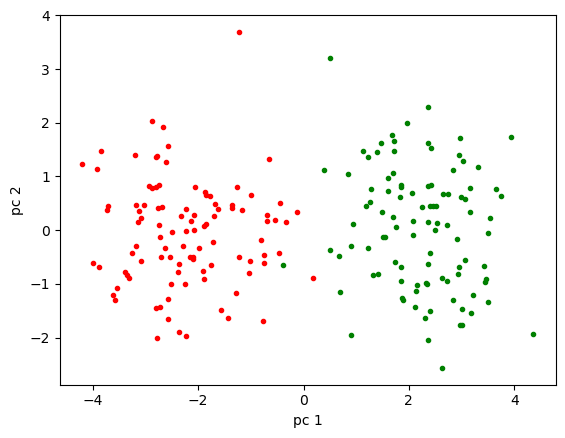

In [17]:
# replace this with your solution, add and remove code and markdown cells as appropriate
toy_data = gen_data()
components, projected_X = pca(toy_data)

fig, ax = plt.subplots()
ax.plot(projected_X[0, :100], projected_X[1, :100], 'r.')
ax.plot(projected_X[0, 100:], projected_X[1, 100:], 'g.')

ax.set_xlabel('pc 1')
ax.set_ylabel('pc 2')

plt.show()

## Eigenfaces

The aim of this section of the tutorial is to see that in some cases, the principal components can be human interpretable.

The dataset we will be using consists of images of Colin Powell, resized to a smaller image, from [LFW](http://vis-www.cs.umass.edu/lfw/). Download the images on Piazza; under Resources/Tute material, look for `lfw_colin.pkl`.

The images are stored in a 3D array of shape `(n_samples, height, width)`, where `n_samples = 236`, `height = 50` and `width = 37`.

1. Reshape the dataset so that its dimensions are `(1850, 236)`, where $1,850 = 50 \times 37$. Essentially, we are flattening a 2D image into a long vector.
2. Use the `pca` function you wrote above to find the top 12 principal components. You should have a matrix of shape `(1850, 12)`.
3. Reshape that matrix to `(12, 50, 37)`, so that we have a collection of 12 images, each with a height of 50 pixels and a width of 37 pixels. These images are called the *eigenfaces* in the dataset. Can you explain why they're called like that?
4. Use the function `plot_gallery` to plot the 12 eigenfaces. Discuss what each component (eigenface) potentially captures; for example, lighting, shape, orientation, etc.

In [18]:
# Visualising images
def plot_gallery(images, titles, h, w, n_row=2, n_col=6):
    """Helper function to plot a gallery of portraits"""
    plt.figure(figsize=(1.8 * n_col, 2.4 * n_row))
    plt.subplots_adjust(bottom=0, left=.01, right=.99, top=.90, hspace=.35)
    for i in range(n_row * n_col):
        plt.subplot(n_row, n_col, i + 1)
        plt.imshow(images[i].reshape((h, w)), cmap=plt.cm.gray)
        plt.title(titles[i], size=12)
        plt.xticks(())
        plt.yticks(())

236 50 37


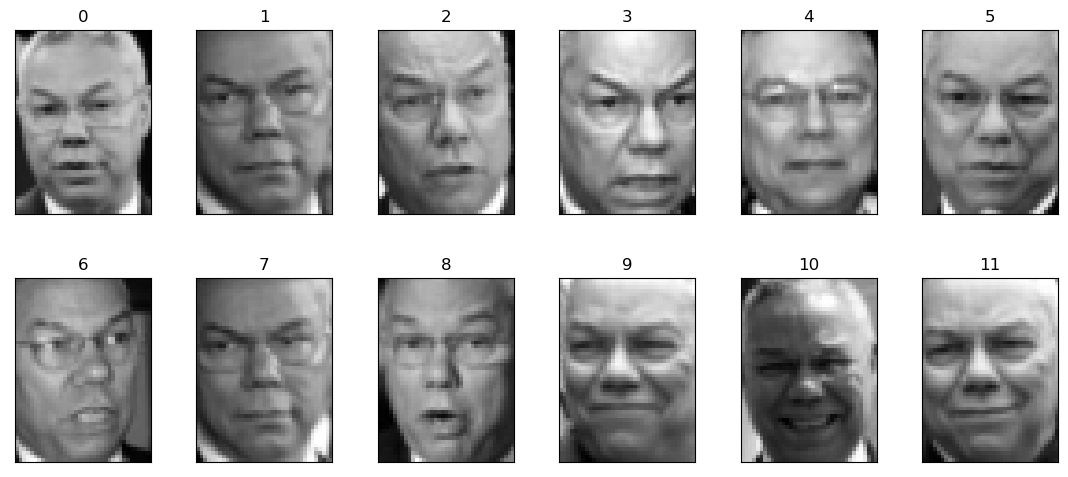

In [19]:
# Read the data
lfw_colin = pickle.load(open('lfw_colin.pkl', 'rb'))

# Introspect the images array to find the shapes (for plotting)
n_samples, height, width = lfw_colin['images'].shape

print(n_samples, height, width)

# Plot the first few images
plot_gallery(lfw_colin['images'], range(n_samples), height, width)

(1850, 12)


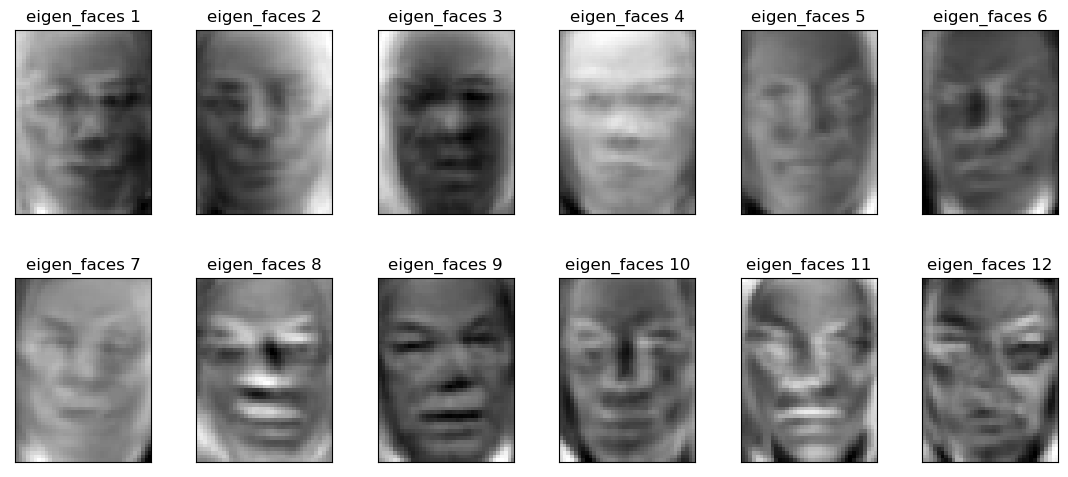

In [24]:
# replace this with your solution, add and remove code and markdown cells as appropriate
n_principal_component = 12

# reshape dataset to (1850, 236)
X = lfw_colin['images'].reshape(n_samples, height*width)
X = X.T #(shape of n_feat * n_samples)
U_k, Z = pca(X, n_principal_component)

print(U_k.shape)

eigen_faces = U_k.T.reshape((12, height, width))

titles = ['eigen_faces %d' % (i + 1) for i in range(12)]
plot_gallery(eigen_faces, titles, height, width)

3. They are called eigenfaces as they are plot along the top 12 principal axis.

4. The 12 eigenfaces are from 12 totally different orientation of angles as well as lighting directions.